In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

%matplotlib inline

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'
                       .format(postgres_user, postgres_pw,postgres_host, 
                        postgres_port, postgres_db))

df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

1. Consider the two variables: *TOTAL_REVENUE* and *TOTAL_EXPENDITURE*. Do these variables have outlier values?


In [3]:
df_cpy = pd.DataFrame()

df_cpy[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']] = df[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']] 

In [4]:
df_cpy['TOTAL_REVENUE'] = df_cpy['TOTAL_REVENUE'].fillna(df_cpy['TOTAL_REVENUE'].mean())
df_cpy['TOTAL_EXPENDITURE'] = df_cpy['TOTAL_EXPENDITURE'].fillna(df_cpy['TOTAL_EXPENDITURE'].mean())

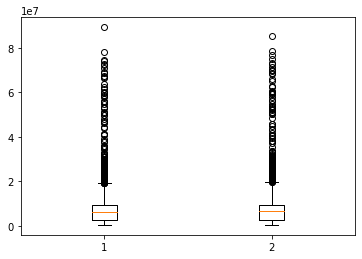

In [5]:
plt.boxplot([df_cpy['TOTAL_REVENUE'], df_cpy['TOTAL_EXPENDITURE']])
plt.show()            


Both variables have outlier values, as can be seen by the above boxplots. The points that fall beyond the whiskers are considered outliers because they are greater than 1.5 times the IQR. This 1.5 IQR threshold is arbitrary and can be set to other values.

2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

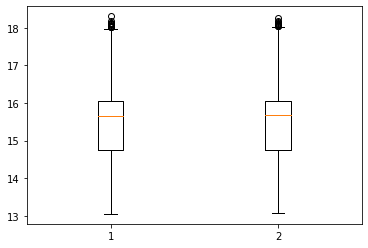

In [6]:
#Performing log transformation to reduce outlier values
plt.boxplot([np.log(df_cpy['TOTAL_REVENUE']), np.log(df_cpy['TOTAL_EXPENDITURE'])])
plt.show()            


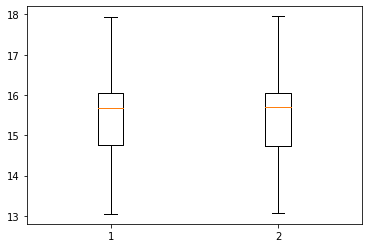

In [7]:
winz_rev = winsorize(np.log(df_cpy['TOTAL_REVENUE']), (0, .01))
winz_expend = winsorize(np.log(df_cpy['TOTAL_EXPENDITURE']), (0, .01))

plt.boxplot([winz_rev, winz_expend])
plt.show()      

3. Create another variable by subtracting the original *TOTAL_EXPENDITURE* from *TOTAL_REVENUE* (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

In [8]:
df_cpy['DEFICIT'] = df_cpy['TOTAL_EXPENDITURE']-df_cpy['TOTAL_REVENUE']

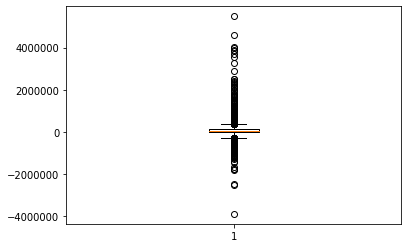

In [9]:
plt.boxplot(df_cpy['DEFICIT'])
plt.show()

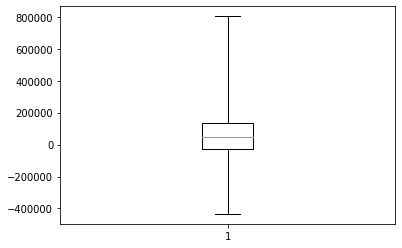

In [10]:
winz_deficit = winsorize(df_cpy['DEFICIT'], (.05, .05))

plt.boxplot(winz_deficit, whis=5)
plt.show()

4. Now create another variable by subtracting the *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. This time, use the outlier eliminated versions of *TOTAL_EXPENDITURE* from *TOTAL_REVENUE*. In this newly created variable, can you find any outliers? If so, eliminate them.

In [11]:
df_cpy2 = pd.DataFrame()
df_cpy2['DEFICIT'] = winz_rev-winz_expend

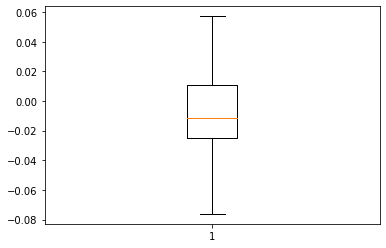

In [12]:
winz_deficit2 = winsorize(df_cpy2['DEFICIT'], (.04, .04))
plt.boxplot(winz_deficit2)
plt.show()

5. Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?


In [14]:
compare_df = pd.DataFrame({'Original': df_cpy['DEFICIT'], 
                           'Problem 3': winz_deficit, 
                           'Problem 4': winz_deficit2})

In [15]:
compare_df.describe()

,Original,Problem 3,Problem 4
count,1.492000e+03,1492.000000,1492.000000
mean,1.045990e+05,78690.912301,-0.008017
std,5.310770e+05,266231.659733,0.031683
min,-3.897129e+06,-433970.000000,-0.076169
25%,-2.965425e+04,-29654.250000,-0.024658
50%,4.849350e+04,48493.500000,-0.011439
75%,1.360070e+05,136007.000000,0.010489
max,5.487742e+06,803208.000000,0.057170


We can see that all of these dataframes have different descriptive statistics (except for count). This is because different methods were used for handeling outliers. 

6. If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?


The values for the method used in problem 3 seem more realistic. It is also possible that large outliers will cancel eachother out. 